<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Fernando Becerra Saavedra </em><br>

</div>

# **Visualización de la Información: Tarea N° 4**
*24 de Octubre de 2024*

**Nombre Estudiante(s)**: `Jaime Castillo Castro - Kurt Castro Ortega - Sofía Vits Contreras - Erick Cisterna Contreras`


**Dataset:** World Happiness Report- 2024

**Fuente:** https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated/data

### **I. GENERALIDADES**

#### **1. Descripción general del notebook**

Mediante el presente documento se abordarán procesos como Feature Engineering, Normalización de Datos y Estandarización de Datos. Lo anterior para trabajar con las visualizaciones en el próximo notebook.

### **II. DESARROLLO**

#### **Paso 1: Importación de Librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib as mpl
from pySankey.sankey import sankey
import squarify
from flexitext import flexitext
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### **Paso 2: Carga de Datos**

A continuación, se carga el dataset limpio generado en la etapa `N° 1 de Exploración y Limpieza`.

In [2]:
# Cargar el dataset principal
ruta = "../Data/dataset_limpio.csv"
df_cleaned = pd.read_csv(ruta, encoding='latin1')
df_cleaned.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Continent
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,Asia
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,Asia
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,Asia
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,Asia
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,Asia


#### **Paso 3: Aplicación de Feature Engineering**

1. **GDP_social_interaction**:
   - **Descripción**: Representa la interacción entre el PIB per cápita (Log GDP per capita) y el soporte social. Mide cómo la combinación de la riqueza económica y el apoyo social puede influir en otros indicadores de bienestar.


2. **Life_health_interaction**:
   - **Descripción**: Muestra la interacción entre la expectativa de vida al nacer y el índice de satisfacción con la vida (Life Ladder). Esta variable combina la salud con el bienestar subjetivo para entender su relación.

3. **Support_GDP_ratio**:
   - **Descripción**: Proporción entre el soporte social y el PIB per cápita. Evalúa el nivel de soporte social en relación con la riqueza económica de cada país o región.

4. **Generosity_corruption_ratio**:
   - **Descripción**: Proporción entre la generosidad y la percepción de la corrupción. Permite analizar si los niveles de generosidad en un país están relacionados con la percepción de la corrupción.

5. **GDP_category**:
   - **Descripción**: Categorización del PIB per cápita en tres niveles: "Bajo", "Medio" y "Alto". Facilita la comparación entre países con diferentes niveles de riqueza.

6. **Life_Ladder_category**:
   - **Descripción**: Categorización del índice de satisfacción con la vida (Life Ladder) en tres niveles: "Bajo", "Medio" y "Alto". Facilita el análisis de la satisfacción con la vida entre diferentes grupos.

In [3]:
# 1. Interacciones entre variables numéricas
# Crear la interacción entre "Log GDP per capita" y "Social support"
df_cleaned['GDP_social_interaction'] = df_cleaned['Log GDP per capita'] * df_cleaned['Social support']

# Crear la interacción entre "Healthy life expectancy at birth" y "Life Ladder"
df_cleaned['Life_health_interaction'] = df_cleaned['Healthy life expectancy at birth'] * df_cleaned['Life Ladder']

# 2. Ratios o proporciones
# Crear una columna de proporción entre "Social support" y "Log GDP per capita"
df_cleaned['Support_GDP_ratio'] = df_cleaned['Social support'] / df_cleaned['Log GDP per capita']

# Crear una columna de proporción entre "Generosity" y "Perceptions of corruption"
df_cleaned['Generosity_corruption_ratio'] = df_cleaned['Generosity'] / df_cleaned['Perceptions of corruption']

# 3. Discretización o binning de variables
# Crear categorías para "Log GDP per capita" en niveles "Bajo", "Medio" y "Alto"
df_cleaned['GDP_category'] = pd.cut(df_cleaned['Log GDP per capita'], 
                                    bins=[5, 8, 10, 12], 
                                    labels=["Bajo", "Medio", "Alto"])

# Crear categorías para "Life Ladder" en niveles "Bajo", "Medio" y "Alto"
df_cleaned['Life_Ladder_category'] = pd.cut(df_cleaned['Life Ladder'], 
                                            bins=[0, 4, 6, 10], 
                                            labels=["Bajo", "Medio", "Alto"])

# Guardar el conjunto de datos con las nuevas columnas en un archivo CSV (opcional)
df_cleaned.to_csv('../Data/dataset_con_nuevas_columnas.csv', index=False)

# Mostrar las primeras filas del dataset con las nuevas columnas
df_cleaned.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Continent,GDP_social_interaction,Life_health_interaction,Support_GDP_ratio,Generosity_corruption_ratio,GDP_category,Life_Ladder_category
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,Asia,3.314850,188.0620,0.061361,0.185941,Bajo,Bajo
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,Asia,4.144968,223.6216,0.073512,0.220000,Bajo,Medio
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,Asia,4.103946,243.1338,0.070791,0.166902,Bajo,Medio
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,Asia,3.949701,196.9648,0.068724,0.218878,Bajo,Bajo
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,Asia,3.991381,195.5811,0.068007,0.301546,Bajo,Bajo


#### **Paso 4: Normalización de datos**

Se realiza el proceso de normalización de las columnas numéricas del dataframe, excluyendo la columna "year" mediante el método **Min-Max Scaling** de `sklearn`, que ajusta los valores al rango 0-1. La decisión de aplicar la normalización en este conjunto de datos se basa en las diferencias significativas en la escala y rango de las variables numéricas. Aglunas variables como el "Log GDP per capita" y "Life Ladder", tienen rangos muchos más amplios que otras, como "Generosity" o "Perceptions of corruption".

In [7]:
# Inicializar el Min-Max Scaler
scaler = MinMaxScaler()

# Excluir la columna "year" de las columnas numéricas a normalizar
columnas_normalizadas = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.drop('year')

# Aplicar la normalización solo a las columnas seleccionadas
normalizada_data = scaler.fit_transform(df_cleaned[columnas_normalizadas])

# Convertir los datos normalizados
normalizada_df = pd.DataFrame(normalizada_data, columns=columnas_normalizadas)

# Mantener las columnas no numéricas y la columna "year"
columnas_no_numericas = df_cleaned.select_dtypes(exclude=['float64', 'int64']).columns

# Combinar el DataFrame de columnas no numéricas con el DataFrame normalizado
final_normalizada_df = pd.concat([df_cleaned[columnas_no_numericas], df_cleaned['year'], normalizada_df], axis=1)

# Guardar el conjunto de datos normalizado en un archivo CSV (opcional)
final_normalizada_df.to_csv('../Data/dataset_normalizado.csv', index=False)

# Mostrar el dataset normalizado
print(final_normalizada_df.head())

  Country name Continent GDP_category Life_Ladder_category  year  Life Ladder  \
0  Afghanistan      Asia         Bajo                 Bajo  2008     0.362570   
1  Afghanistan      Asia         Bajo                Medio  2009     0.463194   
2  Afghanistan      Asia         Bajo                Medio  2010     0.516028   
3  Afghanistan      Asia         Bajo                 Bajo  2011     0.378599   
4  Afghanistan      Asia         Bajo                 Bajo  2012     0.371327   

   Log GDP per capita  Social support  Healthy life expectancy at birth  \
0            0.296471        0.293808                          0.644962   
1            0.322329        0.426877                          0.649381   
2            0.339405        0.409750                          0.653801   
3            0.334038        0.386034                          0.658220   
4            0.347048        0.386034                          0.662640   

   Freedom to make life choices  Generosity  Perceptions of co

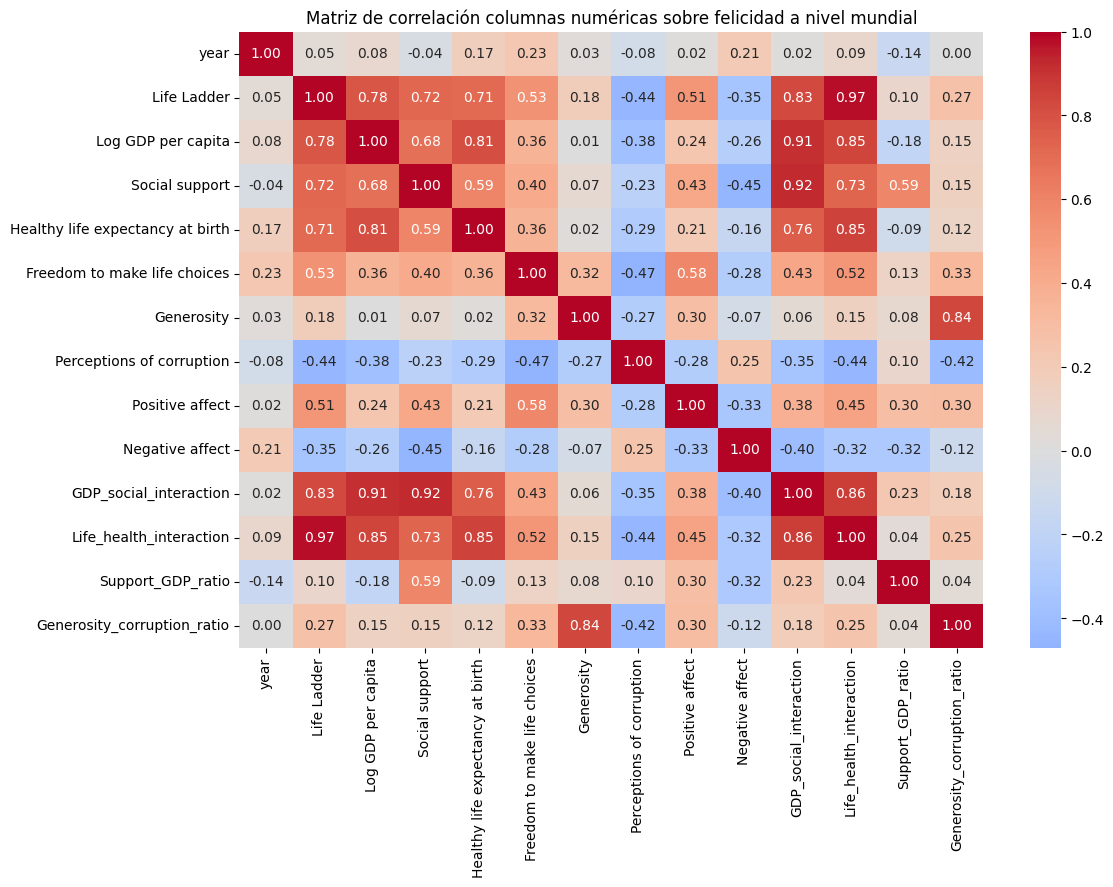

In [8]:
# Se muestra la matriz de correlación de los valores numéricos del dataset
correlation_matrix = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de correlación columnas numéricas sobre felicidad a nivel mundial")
plt.show()

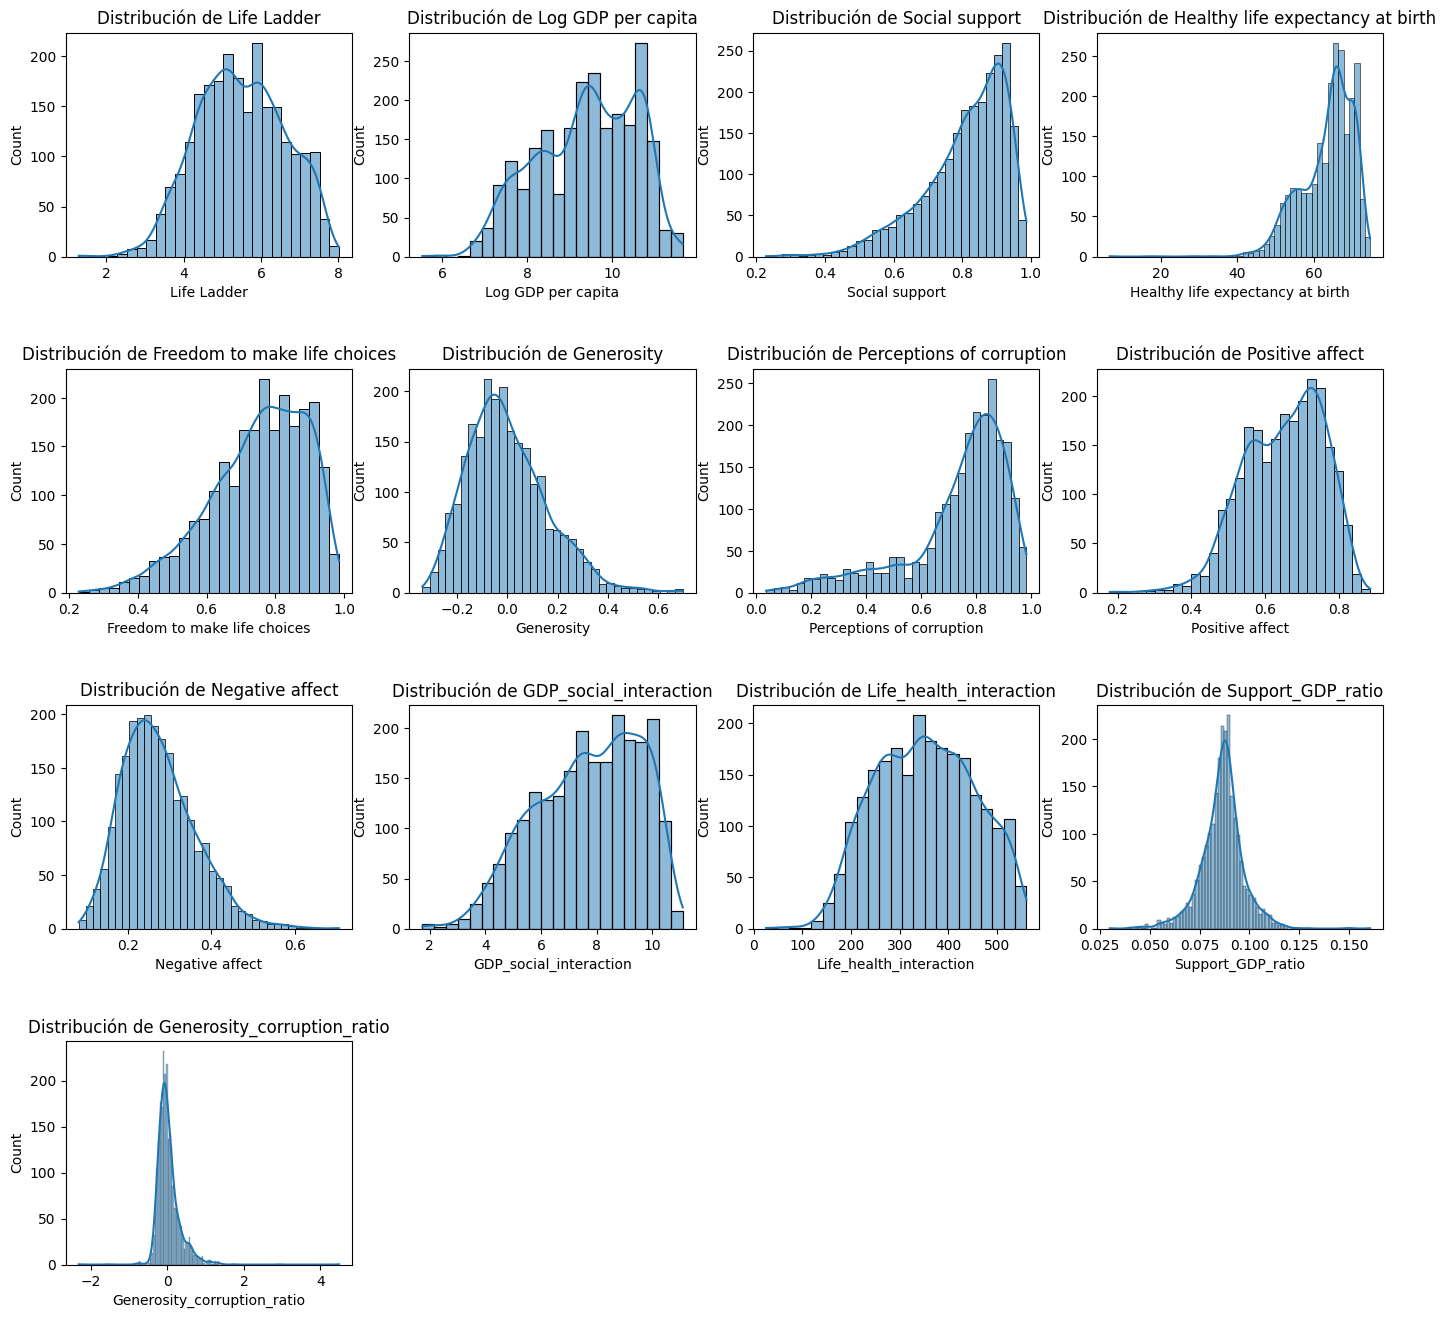

In [9]:
### SE MUESTRA DISTRIBUCIÓN DE VARIABLES ANTES DE NORMALIZACIÓN ####

# Seleccionar todas las columnas numéricas, excluyendo "year"
cols_num = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.drop('year')

# Establecer el número de filas y columnas (7 filas, 2 columnas)
nrows = 4
ncols = 4

# Crear la figura con 4 filas y 4 columnas
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(17, 4 * nrows))
fig.subplots_adjust(hspace=0.5)  # Ajustar el espacio entre gráficos

# Recorrer las variables numéricas y graficar cada histograma
for i, col in enumerate(cols_num):
    row = i // ncols  # Índice de la fila
    col_idx = i % ncols  # Índice de la columna
    sns.histplot(df_cleaned[col], kde=True, ax=ax[row, col_idx])  # Histogramas con curva de densidad (KDE)
    ax[row, col_idx].set_title(f'Distribución de {col}')

# Eliminar cualquier gráfico vacío si hay menos de 14 variables
if len(cols_num) < nrows * ncols:
    for i in range(len(cols_num), nrows * ncols):
        fig.delaxes(ax.flatten()[i])

# Mostrar el gráfico
plt.show()

              year  Life Ladder  Log GDP per capita  Social support  \
count  2363.000000  2363.000000         2363.000000     2363.000000   
mean   2014.763860     0.623711            0.629233        0.766016   
std       5.059436     0.167041            0.187451        0.159535   
min    2005.000000     0.000000            0.000000        0.000000   
25%    2011.000000     0.499555            0.483900        0.679842   
50%    2015.000000     0.618581            0.645796        0.799736   
75%    2019.000000     0.748367            0.791267        0.890646   
max    2023.000000     1.000000            1.000000        1.000000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2363.000000                   2363.000000   
mean                           0.836026                      0.690885   
std                            0.100035                      0.183713   
min                            0.000000                      0.00000

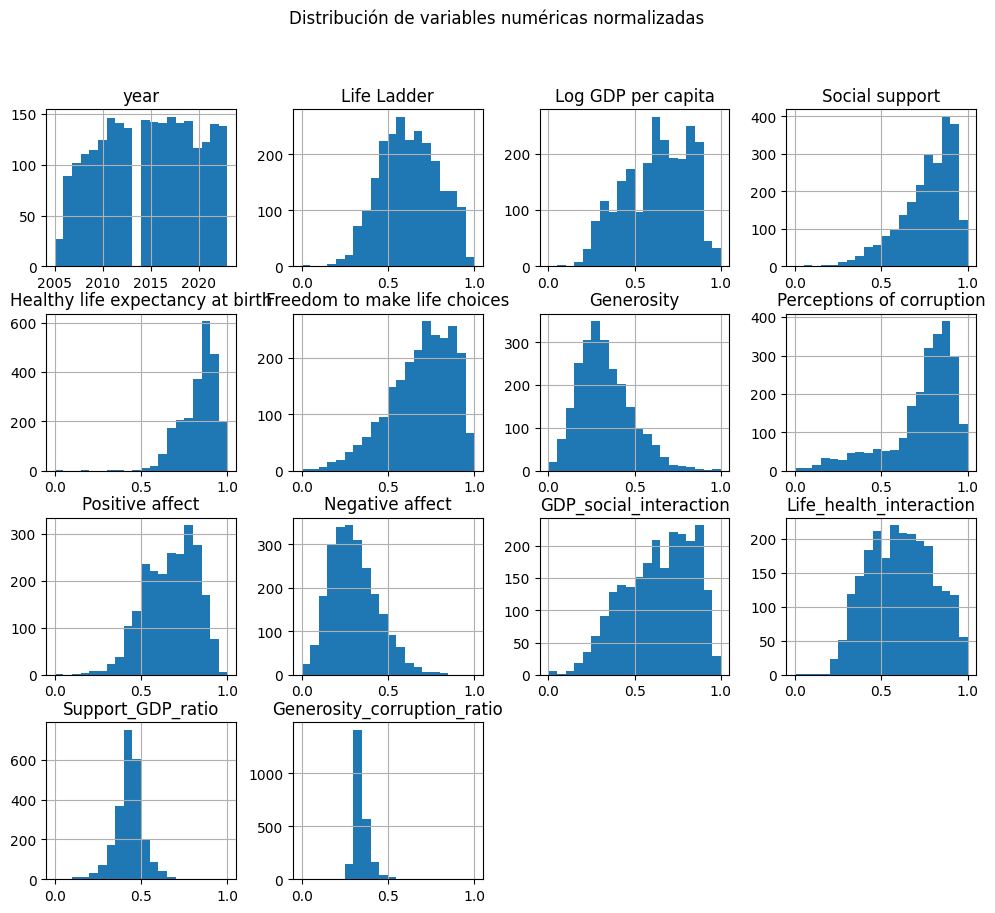

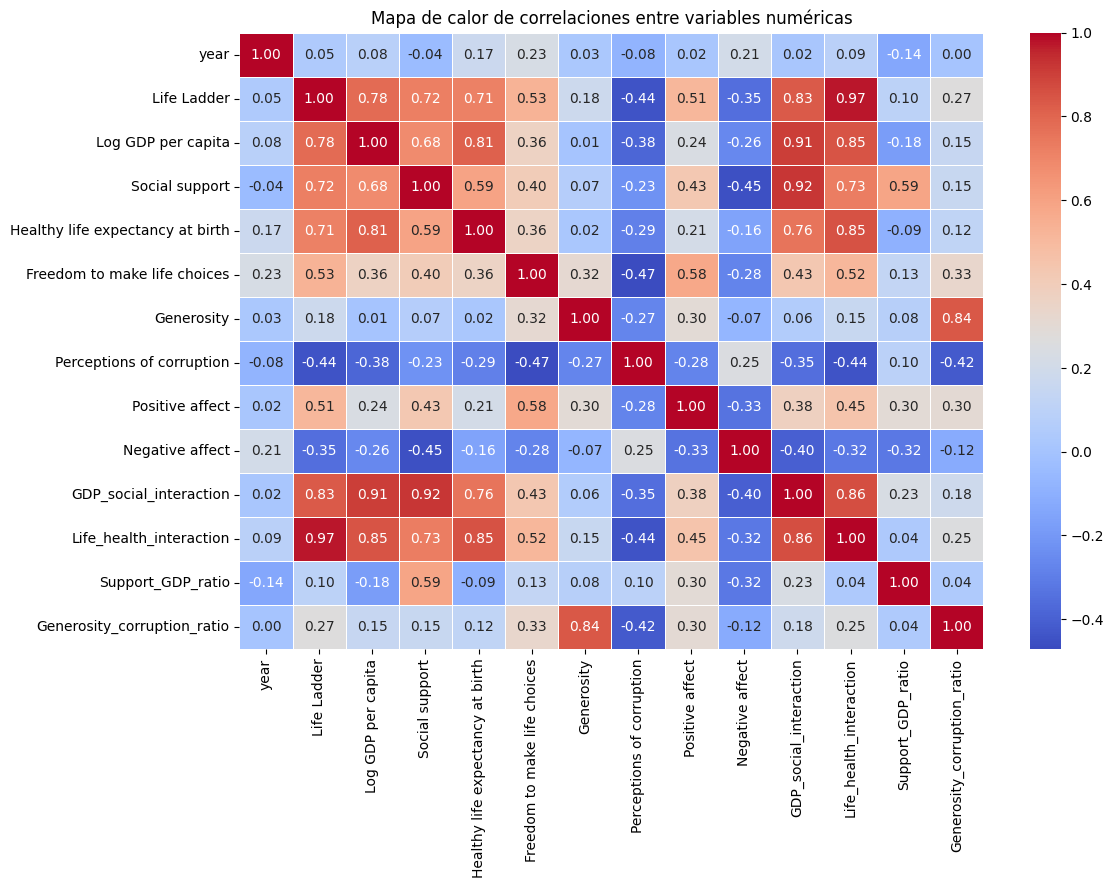

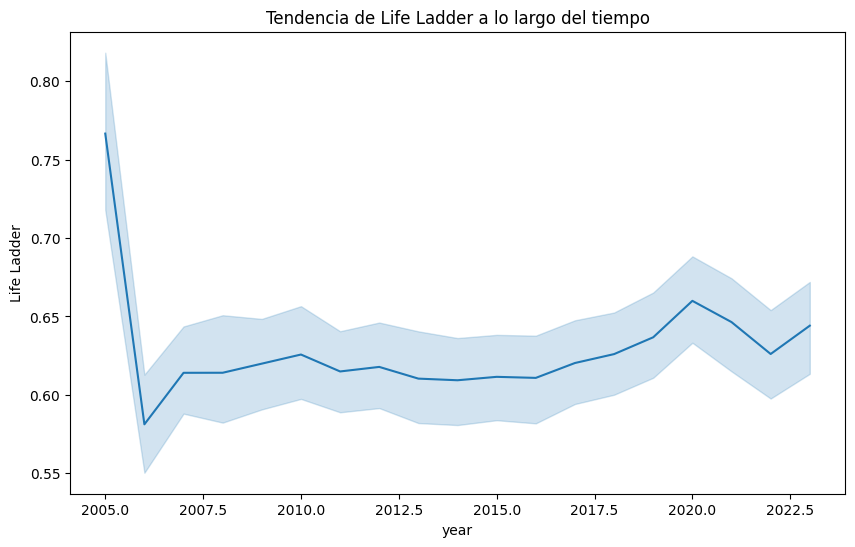

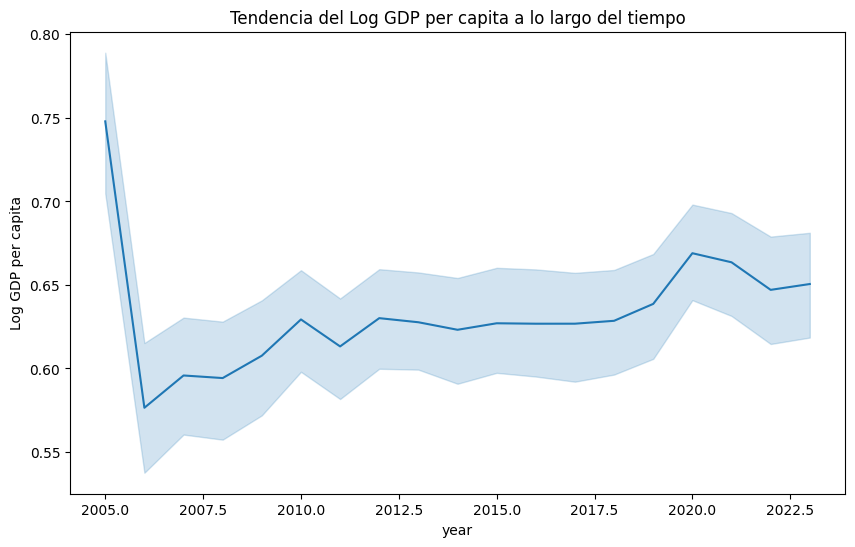

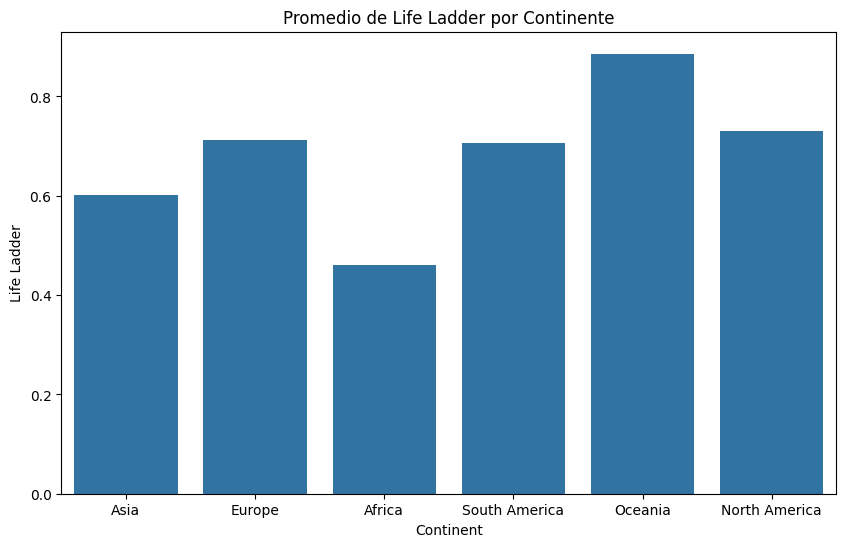

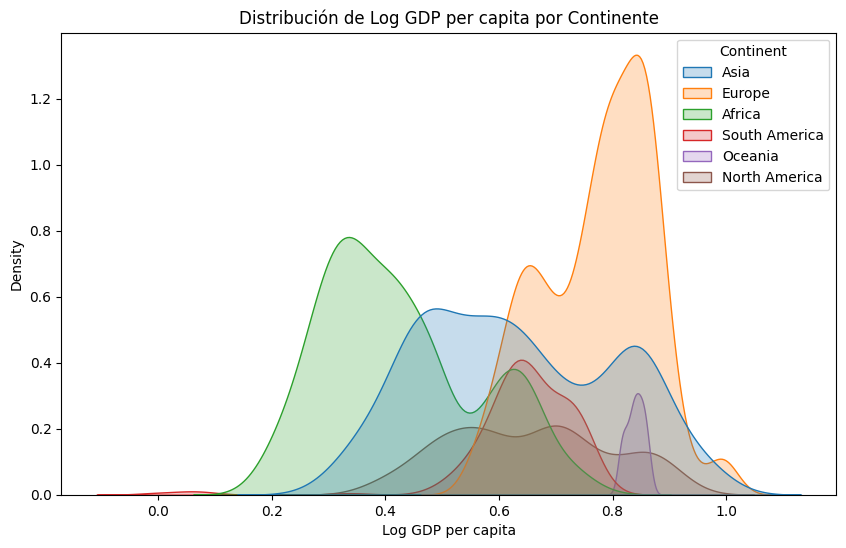

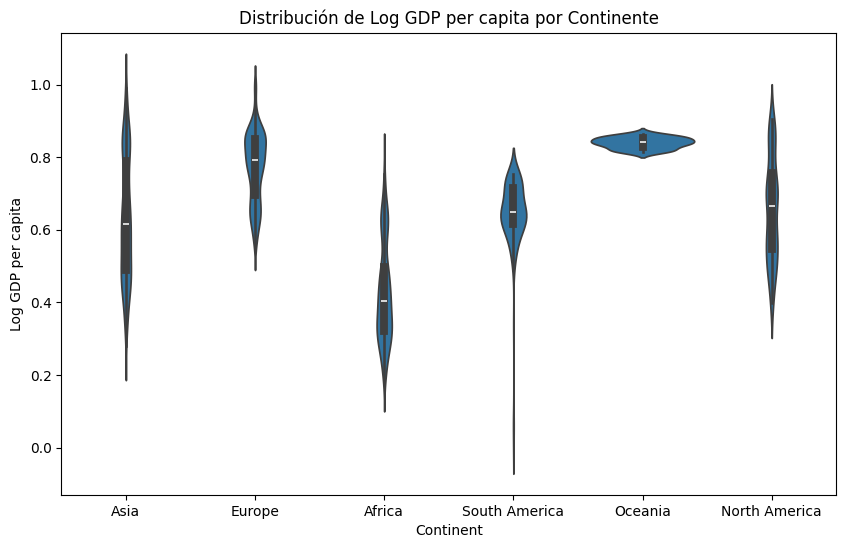

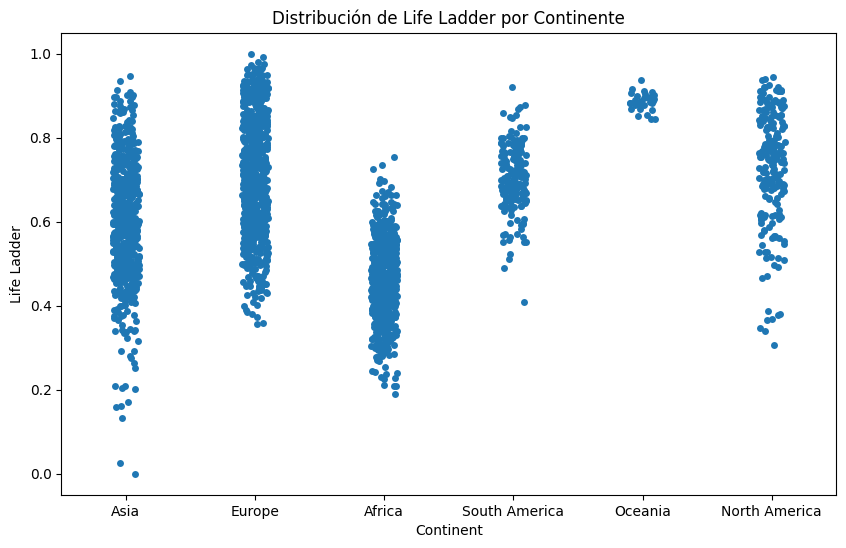

In [10]:
### SE MUESTRA UNA SERIE DE GRÁFICOS PARA VISUALIZAR EL COMPORTAMIENTO DE LAS VARIABLES ####

df = final_normalizada_df

# 1. Estadísticas descriptivas
print(df.describe())

# 2. Histograma de las variables numéricas
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribución de variables numéricas normalizadas', size=12)
plt.show()

# 3. Mapa de calor para visualizar las correlaciones entre las variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

# 4. Análisis temporal: Cambios de "Life Ladder" a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Life Ladder')
plt.title('Tendencia de Life Ladder a lo largo del tiempo')
plt.show()

# 5. Análisis temporal: Cambios de "Log GDP per capita" a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Log GDP per capita')

plt.title('Tendencia del Log GDP per capita a lo largo del tiempo')
plt.show()

# 6. Gráfico de barras para el promedio de Life Ladder por continente
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Life Ladder', data=df, estimator='mean', ci=None)
plt.title('Promedio de Life Ladder por Continente')
plt.show()

# 7. Gráfico de densidad de Log GDP per capita por continente
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Log GDP per capita', hue='Continent', fill=True)
plt.title('Distribución de Log GDP per capita por Continente')
plt.show()

# 8. Gráfico de violín para Log GDP per capita por continente
plt.figure(figsize=(10, 6))
sns.violinplot(x='Continent', y='Log GDP per capita', data=df)
plt.title('Distribución de Log GDP per capita por Continente')
plt.show()

# 9. Gráfico de dispersión categórico (strip plot) para Life Ladder por continente
plt.figure(figsize=(10, 6))
sns.stripplot(x='Continent', y='Life Ladder', data=df, jitter=True)
plt.title('Distribución de Life Ladder por Continente')
plt.show()

#### **Paso 5: Estandarización de datos**

Se implementará el proceso de Estandarización dado que esto será útil cuando se necesite que los datos estén centrados en la media y con una desviación estándar uniforme. Generalmente, se utiliza en modelos estadísticos y algoritmos que asumen que los datos tienen una distribución aproximadamente normal, como regresiones lineales, análisis de componentes pricipales (PCA), y algunos modelos de máquinas de soporte vectorial (SVM).

In [11]:
# Seleccionar las columnas numéricas excluyendo "year"
cols_num = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.drop('year')

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización a las columnas numéricas
df_estandarizado = df_cleaned.copy()  # Hacer una copia del DataFrame
df_estandarizado[cols_num] = scaler.fit_transform(df_cleaned[cols_num])

# Guardar el dataset estandarizado en un nuevo archivo CSV
df_estandarizado.to_csv('../Data/dataset_estandarizado.csv', index=False)

# Mostrar las primeras filas del dataset estandarizado
print(df_estandarizado.head())

  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008    -1.563665           -1.775565       -2.960521   
1  Afghanistan  2009    -0.961150           -1.637591       -2.126237   
2  Afghanistan  2010    -0.644785           -1.546477       -2.233620   
3  Afghanistan  2011    -1.467689           -1.575113       -2.382304   
4  Afghanistan  2012    -1.511233           -1.505692       -2.382304   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         -1.910373                     -0.237337    1.023819   
1                         -1.866183                     -0.517830    1.167252   
2                         -1.821994                     -1.086007    0.736954   
3                         -1.777805                     -1.833988    0.998875   
4                         -1.733615                     -1.582264    1.460353   

   Perceptions of corruption  Positive affect  Negative affect Continent  

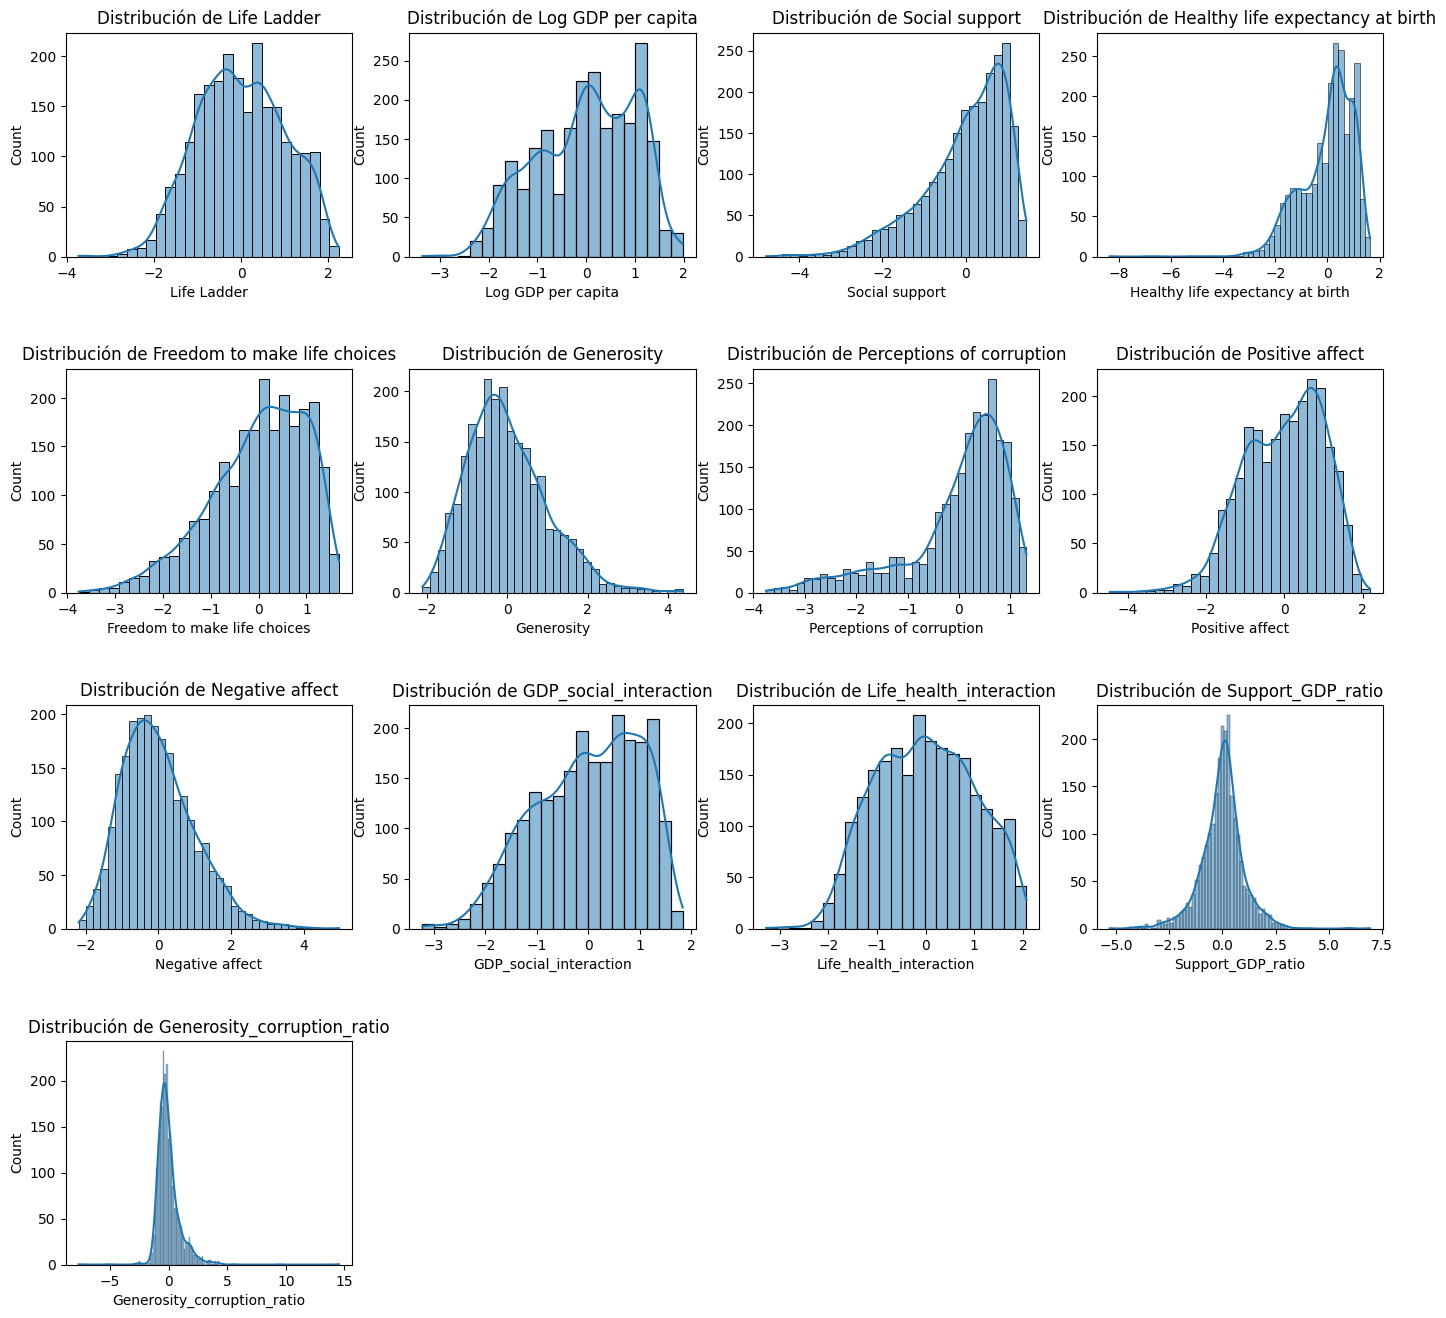

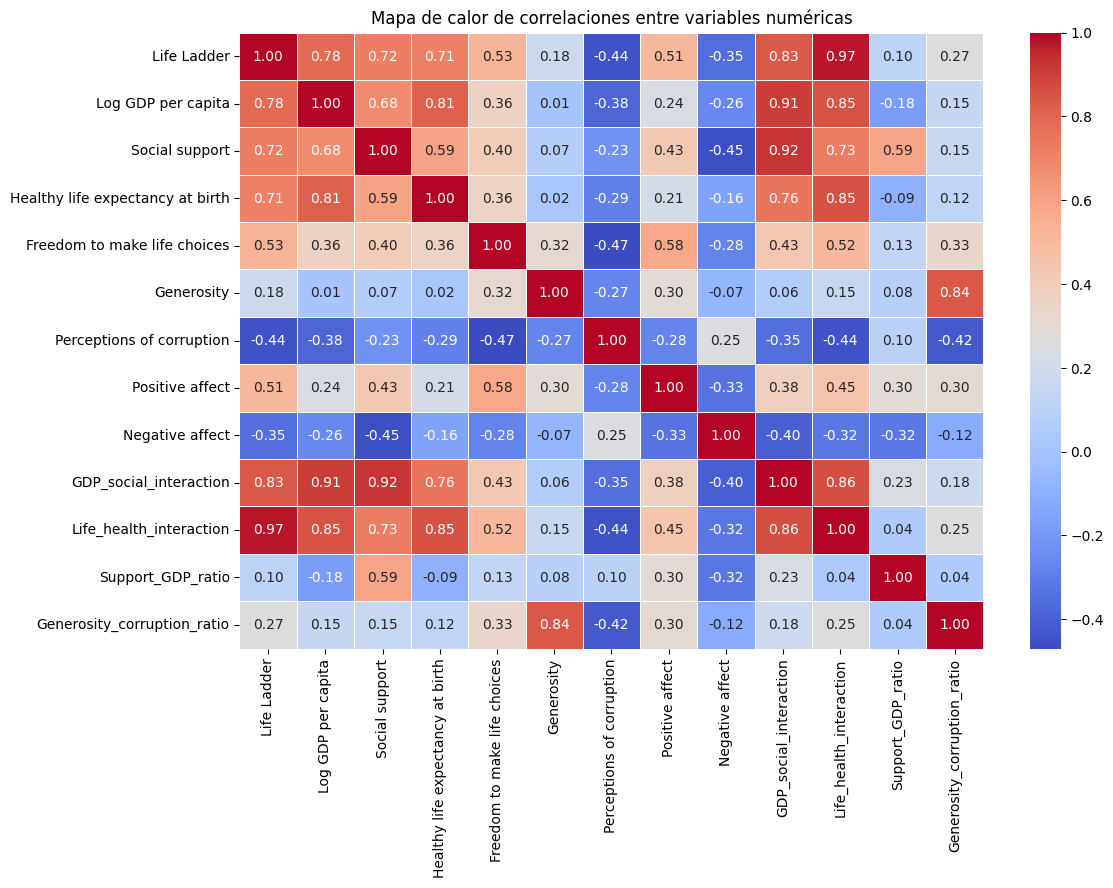

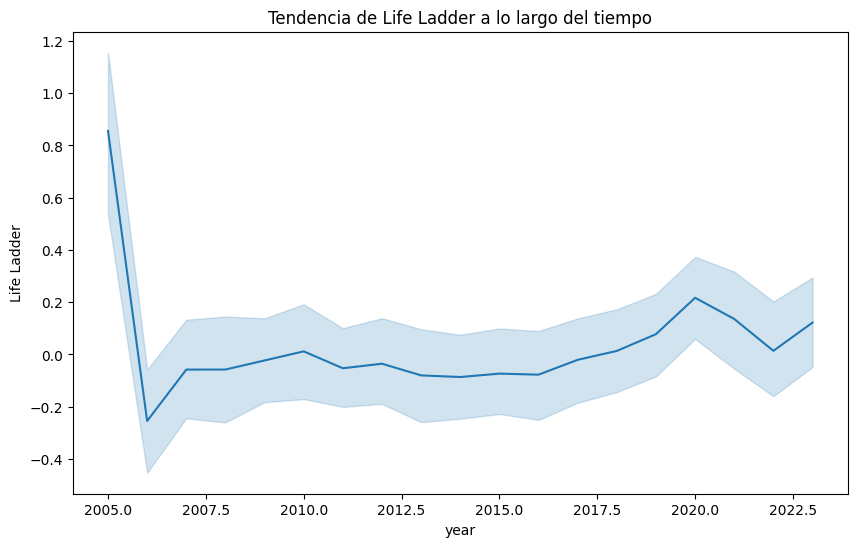

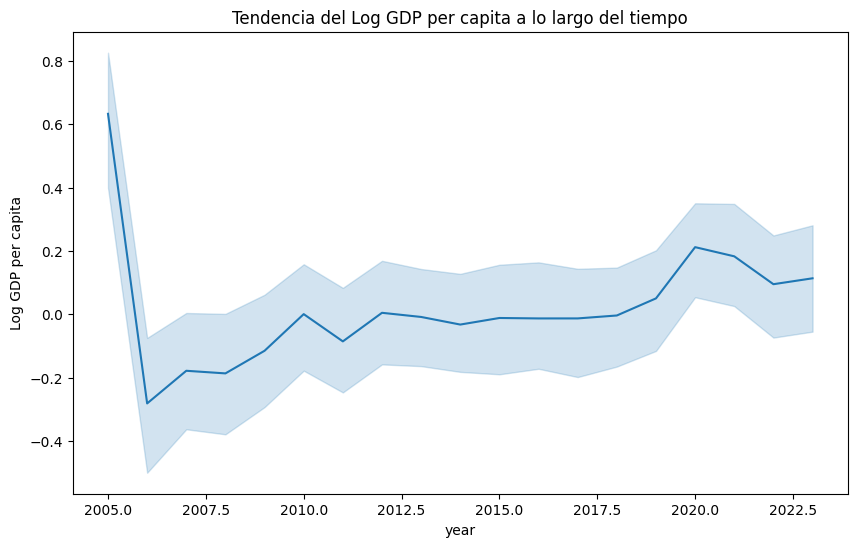

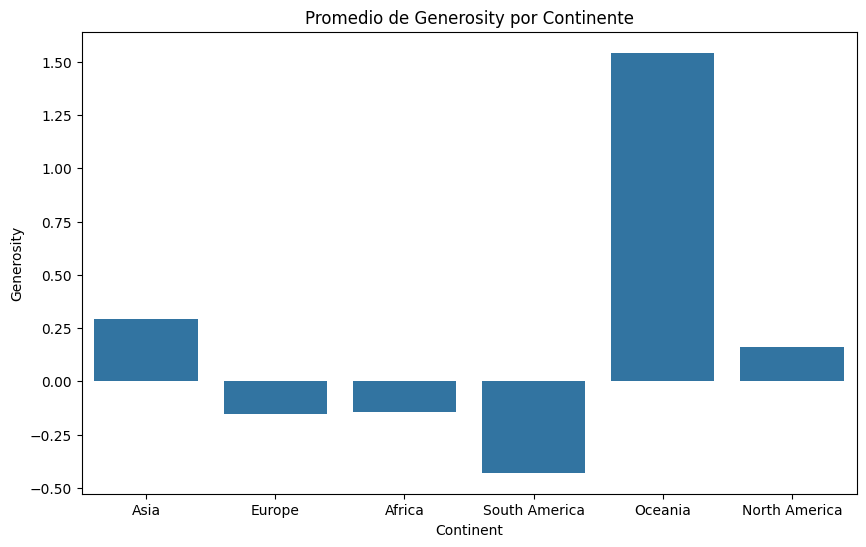

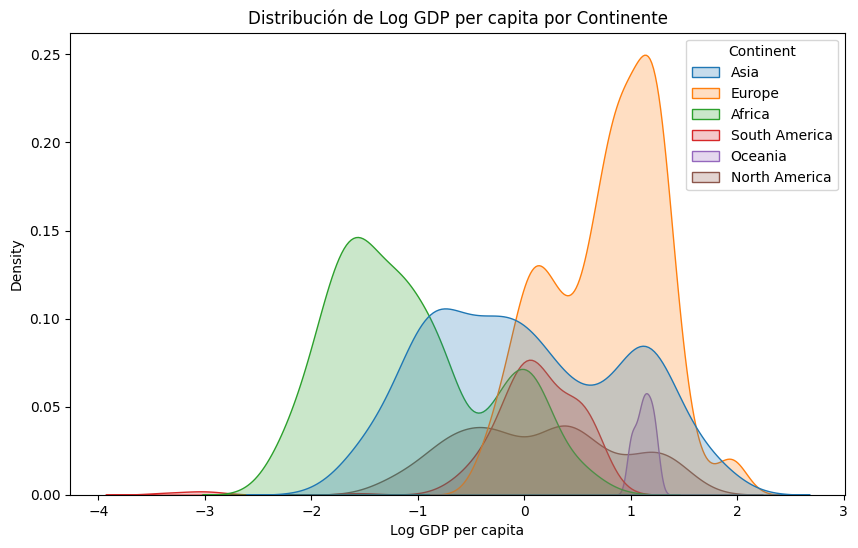

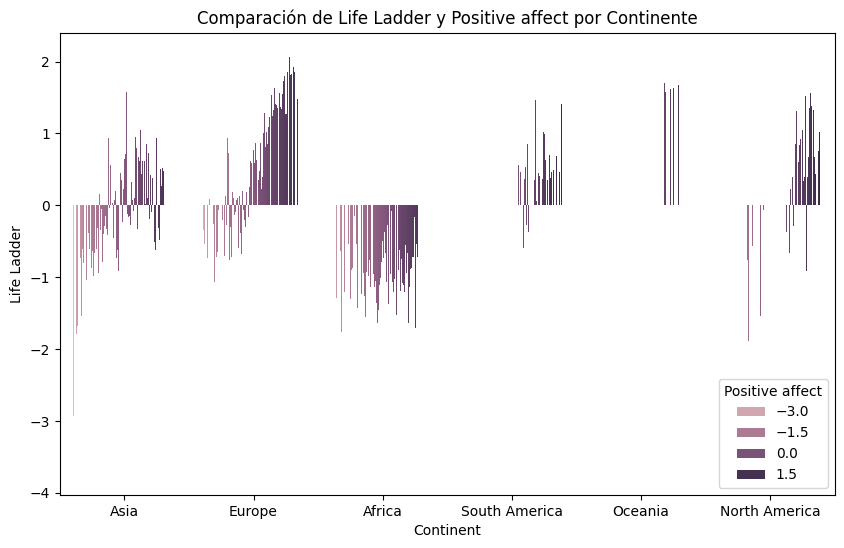

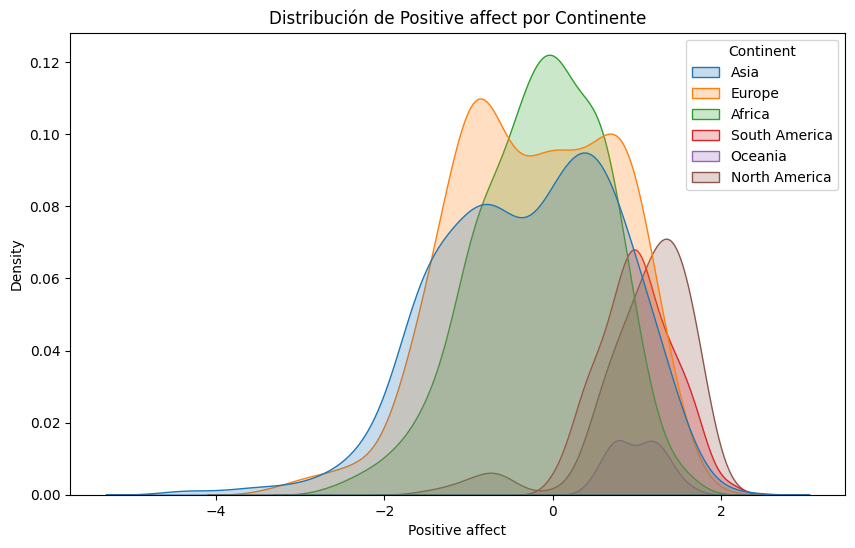

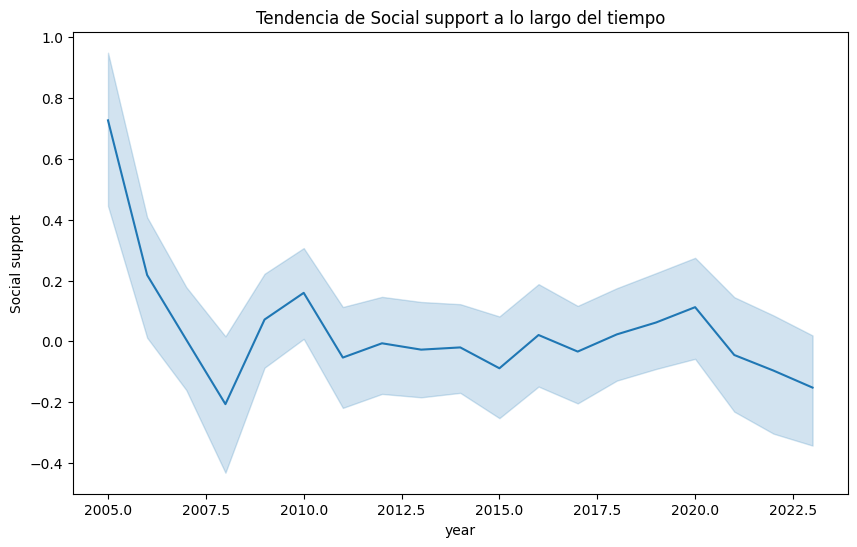

In [12]:
#### SE MUESTRA UNA SERIE DE GRÁFICOS PARA CONOCER EL COMPORTAMIENTO DE LAS VARIABLES ESTANDARIZADAS ###

# Cargar el dataset estandarizado
df_cleaned = df_estandarizado

# Seleccionar las columnas numéricas excluyendo "year"
cols_num = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.drop('year')

# 1. Mostrar distribución de los datos estandarizados
# Establecer el número de filas y columnas (7 filas, 2 columnas)
nrows = 4
ncols = 4

# Crear la figura con 4 filas y 4 columnas
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(17, 4 * nrows))
fig.subplots_adjust(hspace=0.5)  # Ajustar el espacio entre gráficos

# Recorrer las variables numéricas y graficar cada histograma
for i, col in enumerate(cols_num):
    row = i // ncols  # Índice de la fila
    col_idx = i % ncols  # Índice de la columna
    sns.histplot(df_cleaned[col], kde=True, ax=ax[row, col_idx])  # Histogramas con curva de densidad (KDE)
    ax[row, col_idx].set_title(f'Distribución de {col}')

# Eliminar cualquier gráfico vacío si hay menos de 14 variables
if len(cols_num) < nrows * ncols:
    for i in range(len(cols_num), nrows * ncols):
        fig.delaxes(ax.flatten()[i])

# Mostrar el gráfico
plt.show()


# 3. Mapa de calor para visualizar las correlaciones entre las variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned[cols_num].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

# 4. Análisis temporal: Cambios de "Life Ladder" a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cleaned, x='year', y='Life Ladder')
plt.title('Tendencia de Life Ladder a lo largo del tiempo')
plt.show()

# 5. Análisis temporal: Cambios de "Log GDP per capita" a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cleaned, x='year', y='Log GDP per capita')
plt.title('Tendencia del Log GDP per capita a lo largo del tiempo')
plt.show()

# 6. Gráfico de barras para Generosity por continente
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Generosity', data=df_cleaned, estimator='mean', ci=None)
plt.title('Promedio de Generosity por Continente')
plt.show()

# 7. Gráfico de densidad (KDE Plot) para Log GDP per capita por continente
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_cleaned, x='Log GDP per capita', hue='Continent', fill=True)
plt.title('Distribución de Log GDP per capita por Continente')
plt.show()

# 8. Gráfico de barras apilado de Life Ladder y Positive affect por continente
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Life Ladder', hue='Positive affect', data=df_cleaned, ci=None)
plt.title('Comparación de Life Ladder y Positive affect por Continente')
plt.show()

# 9. Gráfico de densidad para Positive affect por continente
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_cleaned, x='Positive affect', hue='Continent', fill=True)
plt.title('Distribución de Positive affect por Continente')
plt.show()

# 10. Gráfico de línea: Tendencia de Social Support a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cleaned, x='year', y='Social support')
plt.title('Tendencia de Social support a lo largo del tiempo')
plt.show()